In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('/content/heart.csv')
df.head()

plt.rc('font', family='NanumBarunGothic')
# age: 환자의 나이
# sex: 환자의 성별 (0: 여성, 1: 남성)
# cp: 흉통 유형 (chest pain type)
#1. 전형적인 협심증 흉통 (typical angina) 2: 비전형적인 협심증 흉통 (atypical angina)
#3: 비협심증 흉통 (non-anginal pain) 4: 증상이 없음 (asymptomatic)
# trtbps: 안정 시 혈압 (resting blood pressure)
# chol: 혈청 콜레스테롤 농도 (serum cholesterol level)
# fbs: 공복 혈당이 120 mg/dL 초과인 경우 (fasting blood sugar > 120 mg/dL) (1: true, 0: false)
# restecg: 안정 시 심전도 결과 (resting electrocardiographic results)
# thalachh: 최대 심박수 (maximum heart rate achieved)
# exng: 운동 유발 협심증 여부 (exercise induced angina) (1: yes, 0: no)
# oldpeak: 운동 후 ST 우울증 (ST depression induced by exercise relative to rest)
# slp: 최대 운동 ST 세그먼트의 기울기 (slope of the peak exercise ST segment)
# caa: 주요 혈관 수 (number of major vessels)
# thall: 특정 구역에 대한 혈류 결함 (thallium stress test result)
# output: 심장 질환 진단 결과 (0: 심장 질환 없음, 1: 심장 질환 있음)

In [ ]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [ ]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [ ]:
heart_attack = df[df['output']==1]
heart_attack.count()

age         165
sex         165
cp          165
trtbps      165
chol        165
fbs         165
restecg     165
thalachh    165
exng        165
oldpeak     165
slp         165
caa         165
thall       165
output      165
dtype: int64

Text(0.5, 1.0, '심장 마비 나이 분포')

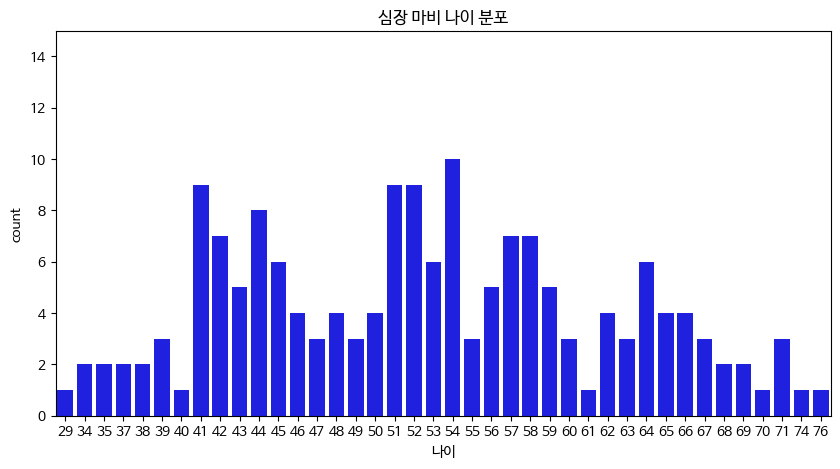

In [ ]:
plt.figure(figsize= (10,5))
sns.countplot(x = 'age',data = heart_attack, color = 'b')
plt.ylim(0,15)
plt.xlabel('나이')
plt.title("심장 마비 나이 분포")

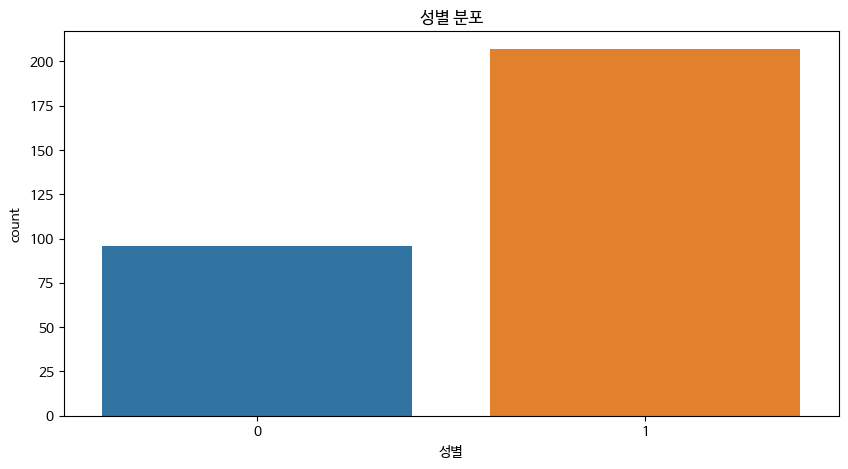

In [ ]:
plt.figure(figsize = (10,5))
sns.countplot(x='sex',data = df)
plt.title('성별 분포')
plt.xlabel('성별')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


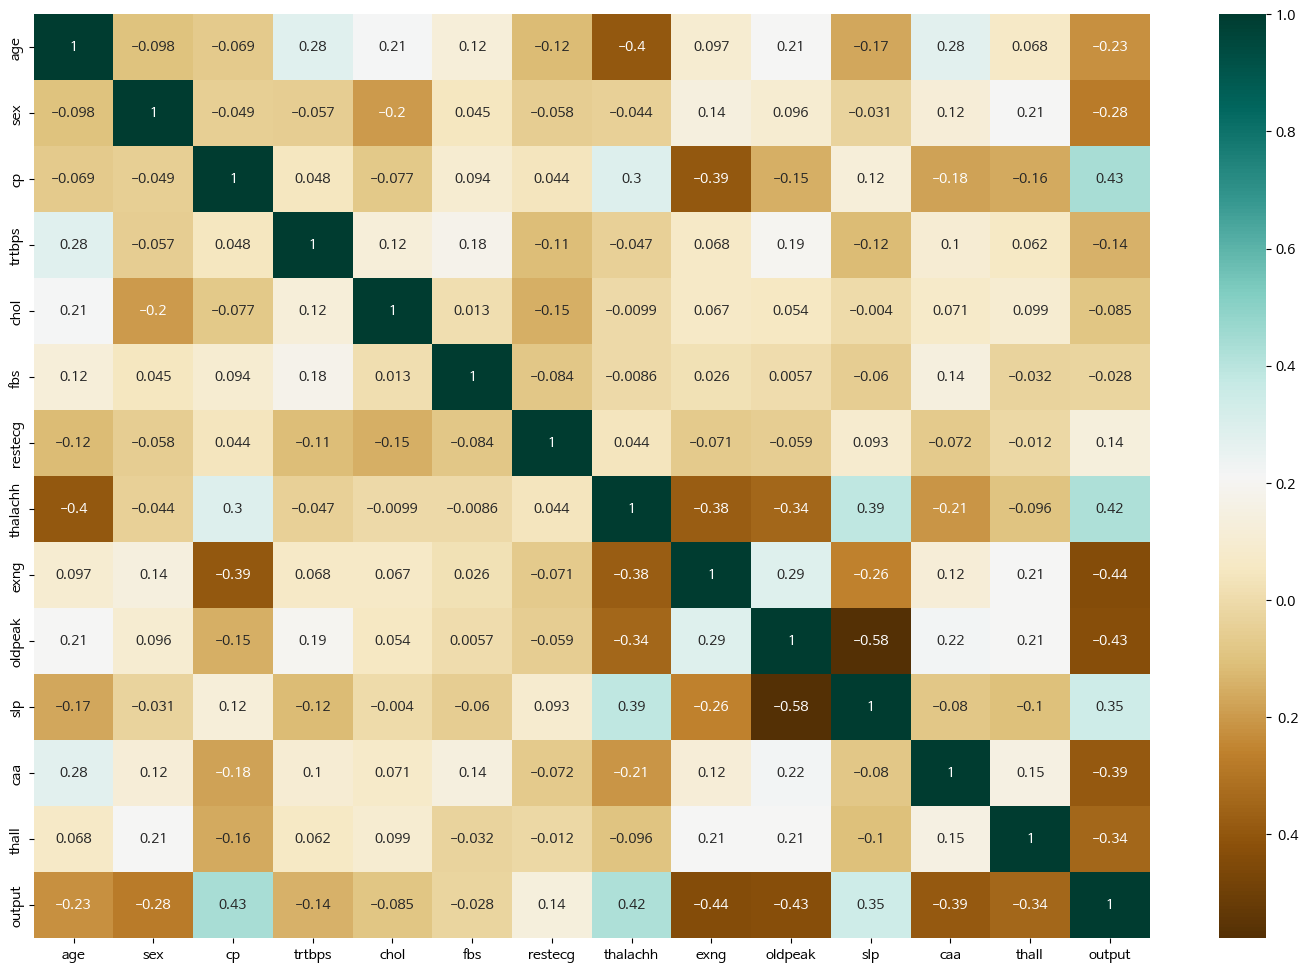

In [ ]:
plt.figure(figsize = (18,12))
sns.heatmap(df.corr(), annot = True,cmap ='BrBG')
plt.show()

In [ ]:
X = df.drop('output',axis =1 )
y = df['output']
X

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state =42)

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver = 'newton-cg')

model.fit(X_train,y_train)

LogisticRegression(solver='newton-cg')

In [ ]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)

print('accuracy_score :', accuracy_score(y_test,y_pred))

accuracy_score : 0.8852459016393442


In [ ]:
from sklearn.model_selection import GridSearchCV

params = {
          'penalty': [None, 'l2'],
         'C':[0.01, 0.1, 1, 5, 10]}

grid = GridSearchCV(model, param_grid = params, scoring = 'accuracy', cv=3,n_jobs=-1,verbose=2)
grid.fit(X_test, y_test)
print('최적 하이퍼 파라미터 : {}, 최적 평균 정확도 : {:.3f}'.format(grid.best_params_, grid.best_score_))

Fitting 3 folds for each of 10 candidates, totalling 30 fits
최적 하이퍼 파라미터 : {'C': 1, 'penalty': 'l2'}, 최적 평균 정확도 : 0.852


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

In [ ]:
#결정 트리
dtc = DecisionTreeClassifier()
params = {'min_impurity_decrease':np.arange(0.0001,0.001,0.0001),
          'max_depth' : range(5,20,1),
          'min_samples_split' : range (2,100,10)
          }
grid_dtc= GridSearchCV(dtc, params, cv=3)
grid_dtc.fit(X_train,y_train)

print('최적 하이퍼 파라미터 : {}, 최적 평균 정확도 : {:.3f}'.format(grid_dtc.best_params_, grid_dtc.best_score_))

최적 하이퍼 파라미터 : {'max_depth': 5, 'min_impurity_decrease': 0.0002, 'min_samples_split': 2}, 최적 평균 정확도 : 0.773


In [ ]:
#랜덤 포레스트
rfc = RandomForestClassifier()
param_grid = {'n_estimators': [10,20,50,100,200],
              'max_depth' : [2,4,6,8,10,12],
              'min_samples_leaf' : [3,4,5,6,7,8,9,10],
              'min_samples_split' : [2,3,4,5,6,7,8,9,10]
              }
grid_rfc= GridSearchCV(rfc, param_grid, cv=3)
grid_rfc.fit(X_train, y_train)

print('최적 하이퍼 파라미터 : {}, 최적 평균 정확도 : {:.3f}'.format(grid_rfc.best_params_, grid_rfc.best_score_))

최적 하이퍼 파라미터 : {'max_depth': 8, 'min_samples_leaf': 6, 'min_samples_split': 3, 'n_estimators': 10}, 최적 평균 정확도 : 0.839


In [ ]:
#최적의 k 값 찾기
knn = KNeighborsClassifier()

param_grid = {'n_neighbors': [2,3,4,5,6,7,8,9,10,11],
              'weights' : ["uniform", "distance"],
              'metric' : ['euclidean', 'manhattan', 'minkowski']}

grid_knn= GridSearchCV(knn, param_grid, cv=3)
grid_knn.fit(X_train, y_train)

print('최적 하이퍼 파라미터 : {}, 최적 평균 정확도 : {:.3f}'.format(grid_knn.best_params_, grid_knn.best_score_))

최적 하이퍼 파라미터 : {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'uniform'}, 최적 평균 정확도 : 0.703


In [ ]:
#서포트 벡터 머신
svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

In [ ]:
print('로지스틱 최적 하이퍼 파라미터 : {}, 최적 평균 정확도 : {:.3f}'.format(grid.best_params_, grid.best_score_))
print('트리 최적 하이퍼 파라미터 : {}, 최적 평균 정확도 : {:.3f}'.format(grid_dtc.best_params_, grid_dtc.best_score_))
print('랜덤 포레스트 최적 하이퍼 파라미터 : {}, 최적 평균 정확도 : {:.3f}'.format(grid_rfc.best_params_, grid_rfc.best_score_))
print('최근접 이웃 최적 하이퍼 파라미터 : {}, 최적 평균 정확도 : {:.3f}'.format(grid_knn.best_params_, grid_knn.best_score_))

로지스틱 최적 하이퍼 파라미터 : {'C': 1, 'penalty': 'l2'}, 최적 평균 정확도 : 0.852
트리 최적 하이퍼 파라미터 : {'max_depth': 5, 'min_impurity_decrease': 0.0002, 'min_samples_split': 2}, 최적 평균 정확도 : 0.773
랜덤 포레스트 최적 하이퍼 파라미터 : {'max_depth': 8, 'min_samples_leaf': 6, 'min_samples_split': 3, 'n_estimators': 10}, 최적 평균 정확도 : 0.839
최근접 이웃 최적 하이퍼 파라미터 : {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'uniform'}, 최적 평균 정확도 : 0.703
